<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-%20Auto%20Decoder%20using%20multi-layer%20in%20mnist%20Dataset%20using%20adam%20and%20adamax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Auto Encoder - Vanilla 
# Vanilla encoders also called single layer encoders. They are used to perform the single layer processesing


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model 

In [100]:
## Creating the encoder part --

Input_layer = Input(shape = (784))
encoder1 = Dense(128, activation='relu' )(Input_layer)
encoder2 = Dense(64, activation='relu' )(encoder1)
encoder3 = Dense(32, activation='relu' )(encoder2)
###### This is the encription part


decoder1 = Dense(64 , activation='relu')(encoder3)
decoder2 = Dense(128 , activation='relu')(decoder1)
decoder3 = Dense(784 , activation='sigmoid')(decoder2)

In [101]:
model_0 = Model(Input_layer, decoder3)

In [102]:
model_0.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 784)               101

In [103]:
encoder_model_0 = Model(Input_layer, encoder3)
encoder_model_0.summary()


Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [104]:
decoder_Input_layer2.shape

TensorShape([None, 64])

In [105]:
decoder_Input_layer = Input(shape = (32))
decoder_Input_layer2 = model_0.layers[-3](decoder_Input_layer)
decoder_Input_layer3 = model_0.layers[-2](decoder_Input_layer2)
decoder_output_layer = model_0.layers[-1](decoder_Input_layer3)
decoder_model_0 = Model(decoder_Input_layer , decoder_output_layer)
decoder_model_0.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 32)]              0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [106]:
(train_data, _), (test_data,_) = tf.keras.datasets.mnist.load_data()

In [107]:
# Data Preprocessing - converting the data form 255 to 0,1 form 
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255
train_data = train_data.reshape(len(train_data), 784)
test_data = test_data.reshape(len(test_data), 784)

In [108]:
#we only need to train the main model

In [115]:
model_0.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    loss=['binary_crossentropy']
)

In [116]:
model_0.fit(
    train_data,
    train_data,
    batch_size = 250,
    epochs = 50,
    verbose = 1,
    validation_data = (test_data, test_data),
    shuffle= True
)

Epoch 1/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0911 - val_loss: 0.0877
Epoch 2/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0885 - val_loss: 0.0877
Epoch 3/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0884 - val_loss: 0.0875
Epoch 4/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0882 - val_loss: 0.0874
Epoch 5/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0878 - val_loss: 0.0871
Epoch 6/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0876 - val_loss: 0.0866
Epoch 7/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0873 - val_loss: 0.0866
Epoch 8/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0870 - val_loss: 0.0865
Epoch 9/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0868 - val_loss: 0.0864
Epoch 10/50
240/240 [==============================] - 3s 14ms/step - loss: 0.0865 - val_lo

In [117]:
encoded_img  = encoder_model_0.predict(test_data)

In [118]:
decoded_img = decoder_model_0.predict(encoded_img)


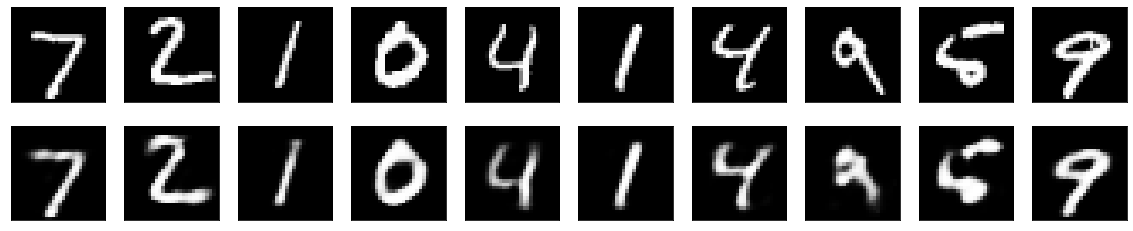

In [91]:
## This is how it is shwoing when using Vanilla autoencoder

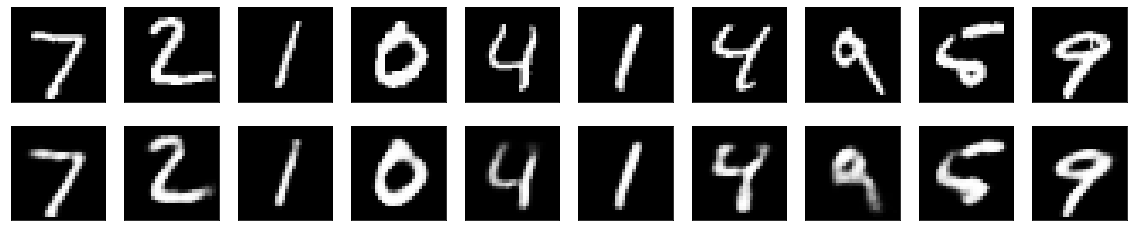

In [114]:
## This is how it is shwoing when using multi layer autoencoder by adamax as optimizer

In [ ]:
## This is how it is shwoing when using multi layer autoencoder by adam as optimizer

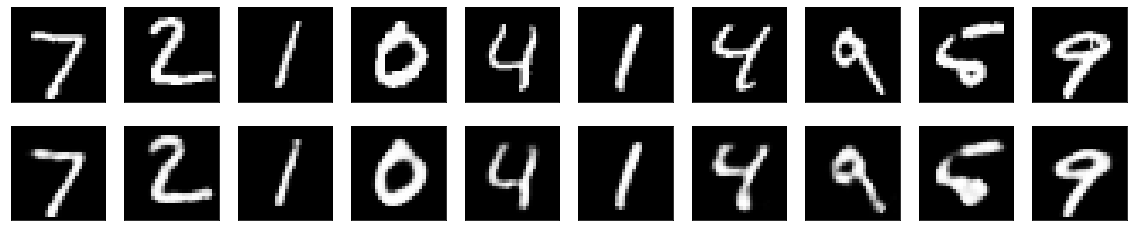

In [119]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
  ax = plt.subplot(2, n , i+1)
  plt.imshow(test_data[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n , i+1 +n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()